### **Title: Customer Churn Prediction**

### **Objective**: <font size="3">Develop a model to predict customer churn for a subscription-based service or business.</font>

### **About Dataset:** <font size="3"> It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.</font>

- What is customer churn?
- Customer churn occurs when customers or subscribers end their association with a company or service. In the highly competitive telecom industry, where annual churn rates range from 15-25 percent, individualized customer retention poses a challenge due to the large customer base. Identifying customers likely to leave in advance allows companies to focus retention efforts on these "high-risk" clients, aiming to expand coverage and enhance customer loyalty. Retaining existing customers is crucial as it is more cost-effective than acquiring new ones. In this market, success hinges on understanding and retaining the customer base.
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [180]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load Libraries**

In [181]:
!pip install catboost

In [182]:
# Import libararies

# For data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# For filtering warnings
import warnings
warnings.filterwarnings('ignore')

# For splitting the data
from sklearn.model_selection import train_test_split

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
# For model performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report


### **Load Data**

In [183]:
df_path = '/content/drive/MyDrive/Codsoft_projects/Customer_Churn_Prediction/Churn_Modelling.csv'
df = pd.read_csv(df_path)

### **View the Data**

In [184]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [186]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [187]:
# Checking for missing data
total = df.isnull().sum().sort_values(ascending = False)
total

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There is no missing data in the dataset.

In [188]:
df.shape

(10000, 14)

In [189]:
# Checking for Duplicates
column_names =df.columns
print(df.duplicated(subset=column_names, keep=False).sum())

0


- No duplicates are present in the dataset.

In [190]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [191]:
# Dropping unnecessary columns

df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [192]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###**Exploratory Data Analysis (EDA)**

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [194]:
# Check for data imbalance
df.Exited.value_counts()/10000*100

0    79.63
1    20.37
Name: Exited, dtype: float64

The dataset is highly imbalanced

In [195]:
# Visualizing Class distribution

fig = px.pie(df.Exited ,values = df.Exited .value_counts(),
             names=['Exit', 'Not Exit'], title='Customers will Exit the company or not')
fig.show()

79.6% of customers exited the oraganization or the company whereas, 20.4% of customer did not exit.

In [196]:
# Segregating the categorical and numerical features
cat_features = [col for col in df.columns if df[col].nunique() <= 25]
num_features = [col for col in df.columns if df[col].nunique() > 25]


In [197]:
print(cat_features)
print(num_features)


['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
['CreditScore', 'Age', 'Balance', 'EstimatedSalary']


In [198]:
def cat_summary_with_graph(dataframe, col_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])

    fig.add_trace(go.Bar(y=dataframe[col_name].value_counts().values.tolist(),
                         x=[str(i) for i in dataframe[col_name].value_counts().index],
                         text=dataframe[col_name].value_counts().values.tolist(),
                         textfont=dict(size=15),
                         name=col_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=colors,
                                     line=dict(color='#DBE6EC',
                                               width=1))),
                  row=1, col=1)

    fig.add_trace(go.Pie(labels=dataframe[col_name].value_counts().keys(),
                         values=dataframe[col_name].value_counts().values,
                         textfont=dict(size=20),
                         textposition='auto',
                         showlegend=False,
                         name=col_name,
                         marker=dict(colors=colors)),
                  row=1, col=2)

    fig.update_layout(title={'text': col_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')

    iplot(fig)


colors = ['#494BD3', '#E28AE2', '#F1F481', '#79DB80', '#DF5F5F',
              '#69DADE', '#C2E37D', '#E26580', '#D39F49', '#B96FE3']

In [199]:
for cat_feature in cat_features:
    cat_summary_with_graph(df, cat_feature)

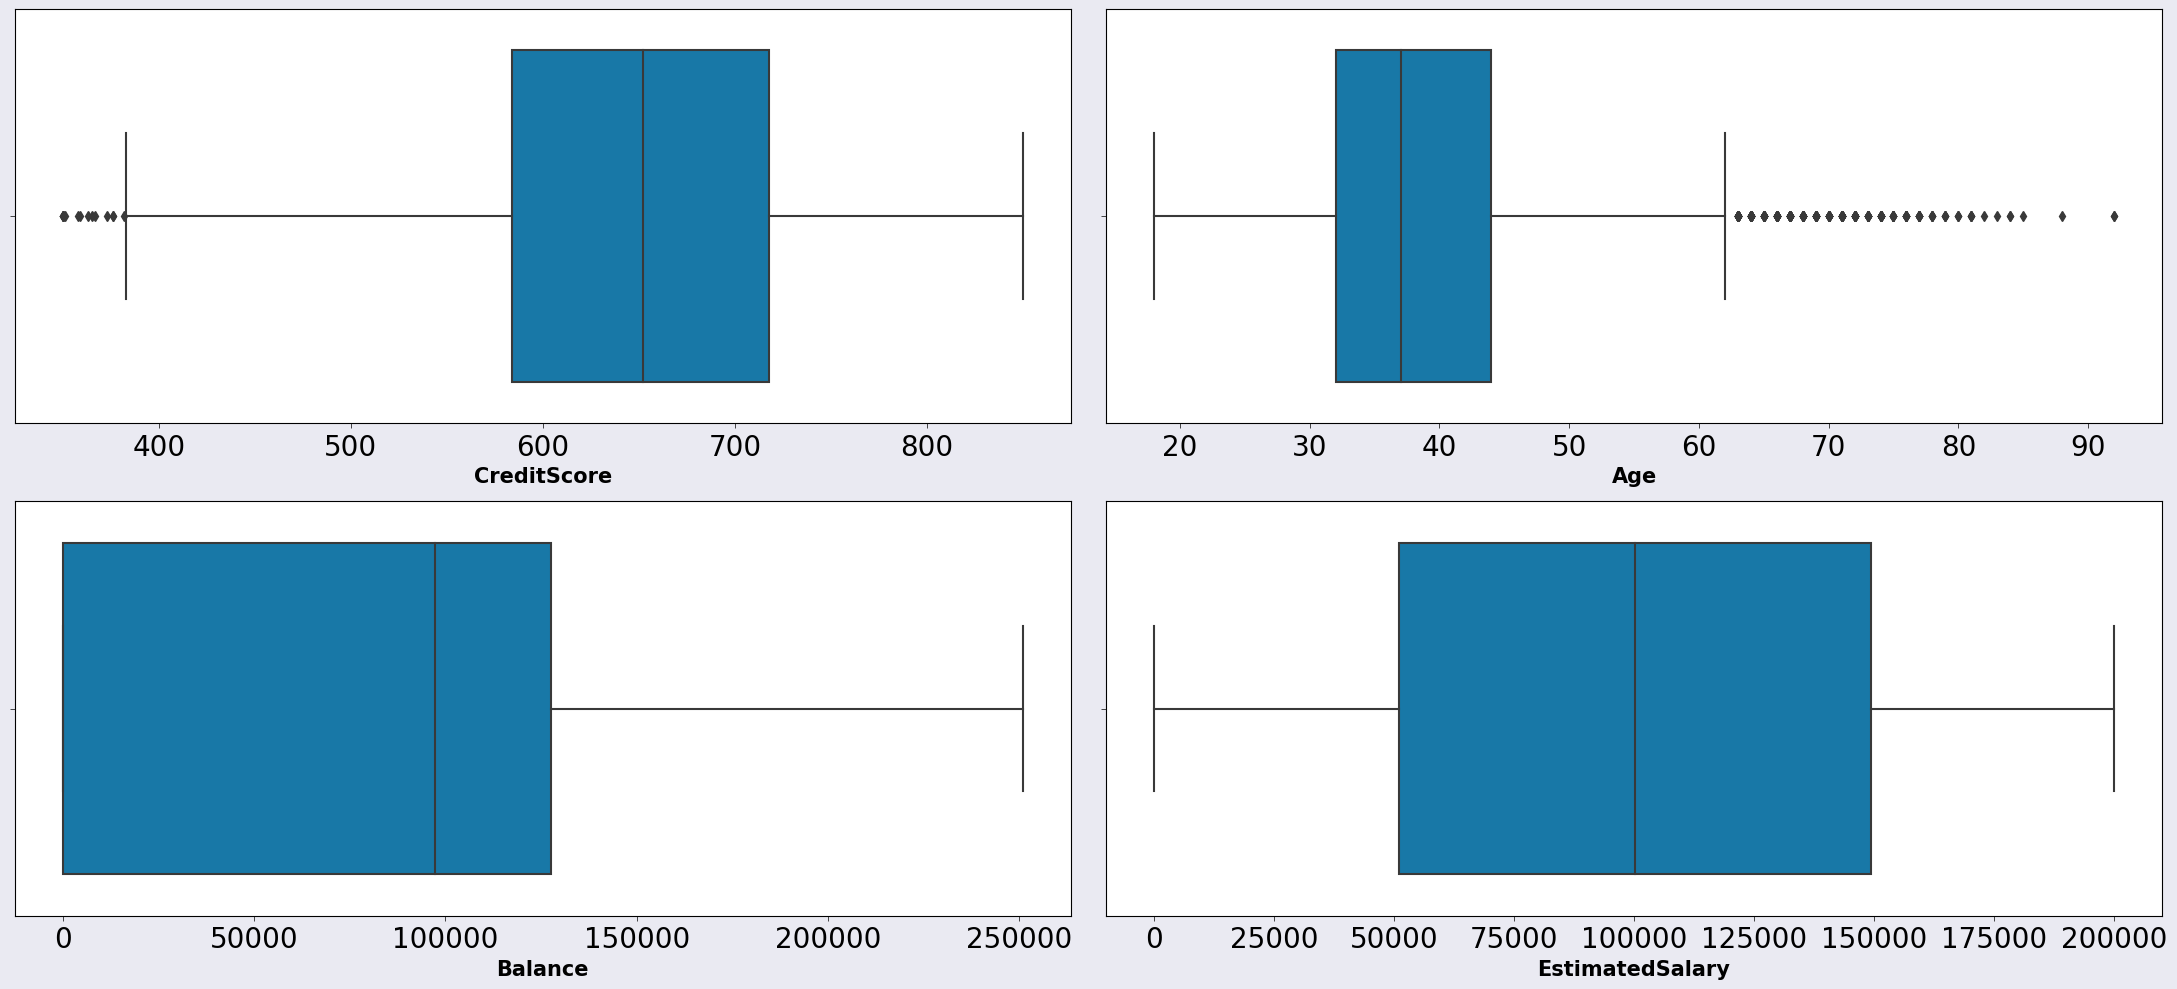

In [200]:
# Plot Outliers
ncols = 2
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(22, 10), facecolor='#EAEAF2')

for r in range(nrows):
    for c in range(ncols):
        col = num_features[r * ncols + c]
        sns.boxplot(x=df[col], ax=axes[r, c], palette='winter')
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=15, fontweight='bold')
        axes[r, c].tick_params(labelsize=20, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(4)
        axes[r, c].yaxis.offsetText.set_fontsize(4)

# Adjust layout to prevent label merging
plt.tight_layout()
plt.show()


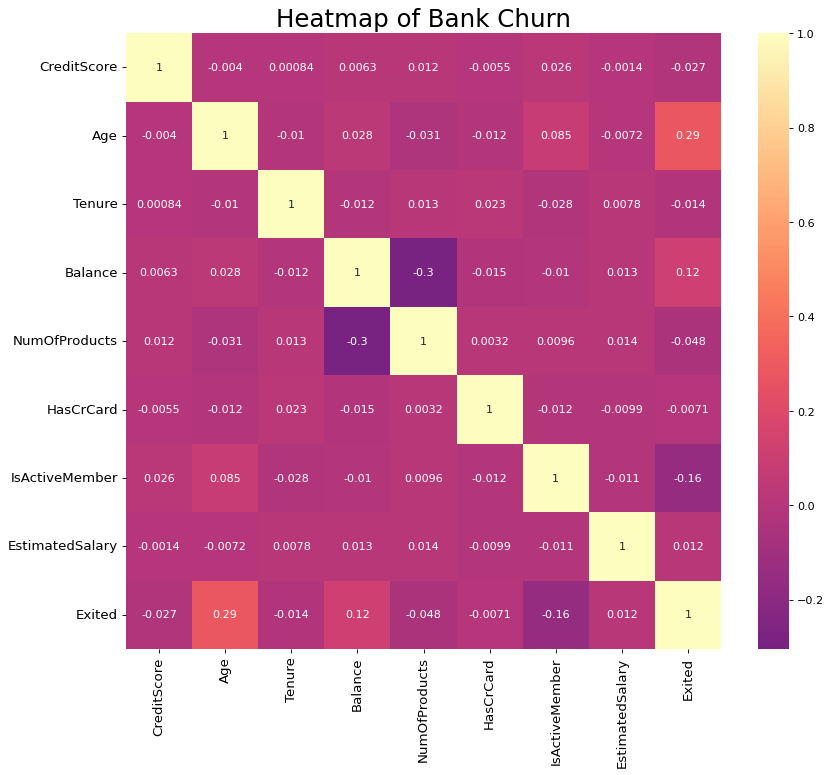

In [201]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns,cmap='magma',center=0, annot=True)


plt.title('Heatmap of Bank Churn', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### **Data Preprocessing**

#### **OneHot Encoding**

In [202]:
# OneHot Encoding - converting categorical variables into binary vectors
df= pd.get_dummies(df, columns= ['Geography', 'Gender'], drop_first=True, dtype=np.int8)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


#### **Splitting the data**

In [203]:
# Split the data into training and test sets
X = df.drop('Exited', axis=1)
y = df['Exited']

In [204]:
X.shape

(10000, 11)

In [205]:
y.shape

(10000,)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=123, test_size=0.2, shuffle=True)

#### **Feature Scaling**

In [207]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Predictive Models**

### **Logistic Regression**

In [208]:
#  Initialize and train Logistic Regression model

log_model = LogisticRegression()
log_model.fit(X_train, y_train)


LogisticRegression()

In [209]:
# Make predictions on the Test set

log_predictions = log_model.predict(X_test)

In [210]:
# Evaluate the performance of the model

log_accuracy = accuracy_score(y_test, log_predictions)
log_precision = precision_score(y_test, log_predictions)
log_recall = recall_score(y_test, log_predictions)
log_f1 = f1_score(y_test, log_predictions)

print('Accuracy:', round(log_accuracy, 2))
print('Precision:', round(log_precision, 2))
print('Recall:', round(log_recall, 2))
print('F1 Score:', round(log_f1, 2))

Accuracy: 0.79
Precision: 0.45
Recall: 0.07
F1 Score: 0.13


In [211]:
# Calculate classification report

conf_matrix = confusion_matrix(y_test, log_predictions)
class_report = classification_report(y_test, log_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.45      0.07      0.13       407

    accuracy                           0.79      2000
   macro avg       0.63      0.53      0.50      2000
weighted avg       0.73      0.79      0.73      2000



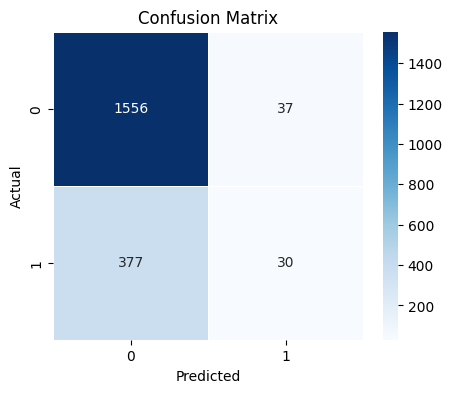

True Positives: 1556
False Positives: 37
True Negatives: 30
False Negatives: 377


In [212]:
#Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Hyperparameter tuning**

In [213]:
# Create the Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the range of regularization parameter 'C'
    'penalty': ['l1', 'l2']  # Adjust the regularization penalty type
}

# Create the GridSearchCV object
grid_search_logistic = GridSearchCV(estimator=logistic_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the data
grid_search_logistic.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search_logistic.best_params_
best_logistic_model = grid_search_logistic.best_estimator_
best_score = grid_search_logistic.best_score_

# Evaluate the best model on the test set
test_accuracy = best_logistic_model.score(X_test, y_test)

# Print the results
print("Best Parameters:", best_params)
print("Best Model:", best_logistic_model)
print("Best Cross-Validation Score:", best_score)
print("Test Accuracy:", test_accuracy)

Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Best Model: LogisticRegression(C=0.01, random_state=42)
Best Cross-Validation Score: 0.789
Test Accuracy: 0.793


### **Random Forest**

In [214]:
# Initialize and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [215]:
# Make predictions on Test Set
rf_predictions = rf_model.predict(X_test)

In [216]:
# Evaluate the performance of the model

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print('Accuracy:', round(rf_accuracy, 2))
print('Precision:', round(rf_precision, 2))
print('Recall:', round(rf_recall, 2))
print('F1 Score:', round(rf_f1, 2))

Accuracy: 0.87
Precision: 0.77
Recall: 0.5
F1 Score: 0.6


In [217]:
# Calculate classification report

conf_matrix = confusion_matrix(y_test, rf_predictions)
class_report = classification_report(y_test, rf_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



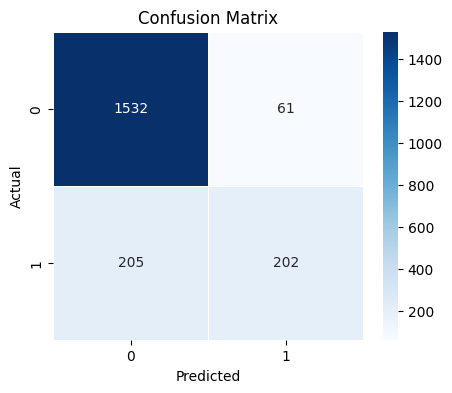

True Positives: 1532
False Positives: 61
True Negatives: 202
False Negatives: 205


In [218]:
#Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Hyperparameter Tuning**

In [219]:
rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Adjust the number of trees in the forest
    'max_depth': [None, 10, 20],  # Adjust the maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Adjust the minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Adjust the minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best model
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_
best_score_rf = grid_search_rf.best_score_

# Evaluate the best model on the test set
test_accuracy_rf = best_rf_model.score(X_test, y_test)

# Print the results
print("Best Parameters (Random Forest):", best_params_rf)
print("Best Model (Random Forest):", best_rf_model)
print("Best Cross-Validation Score (Random Forest):", best_score_rf)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

Best Parameters (Random Forest): {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Model (Random Forest): RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)
Best Cross-Validation Score (Random Forest): 0.8653749999999999
Test Accuracy (Random Forest): 0.8715


### **KNN (K-Nearest Neighbors)**

In [220]:
#Initialize and train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [221]:
# Make predictions on test data
knn_predictions = knn_model.predict(X_test)

In [222]:
# Evaluate the performance of the model

knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

print('Accuracy:', round(knn_accuracy, 2))
print('Precision:', round(knn_precision, 2))
print('Recall:', round(knn_recall, 2))
print('F1 Score:', round(knn_f1, 2))

Accuracy: 0.76
Precision: 0.2
Recall: 0.07
F1 Score: 0.1


In [223]:
# Calculate classification report

conf_matrix = confusion_matrix(y_test, knn_predictions)
class_report = classification_report(y_test, knn_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1593
           1       0.20      0.07      0.10       407

    accuracy                           0.76      2000
   macro avg       0.50      0.50      0.48      2000
weighted avg       0.68      0.76      0.71      2000



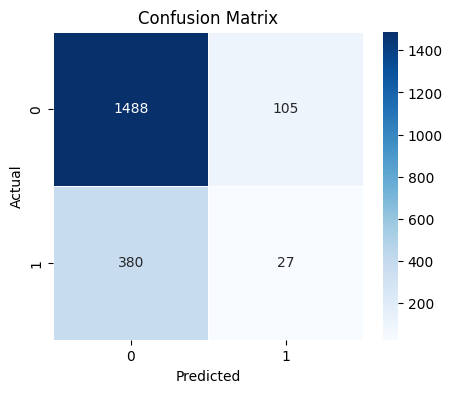

True Positives: 1488
False Positives: 105
True Negatives: 27
False Negatives: 380


In [224]:
#Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **SVM (Support Vector Machines)**

In [225]:
# Initialize and train SVM model
svm_model = SVC(C=2.0,kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(C=2.0)

In [226]:
# Make predictions on test data
svm_predictions = svm_model.predict(X_test)

In [227]:
# Evaluate the performance of the model

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print('Accuracy:', round(svm_accuracy, 2))
print('Precision:', round(svm_precision, 2))
print('Recall:', round(svm_recall, 2))
print('F1 Score:', round(svm_f1, 2))

Accuracy: 0.8
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [228]:
# Calculate classification report

conf_matrix = confusion_matrix(y_test, svm_predictions)
class_report = classification_report(y_test, svm_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



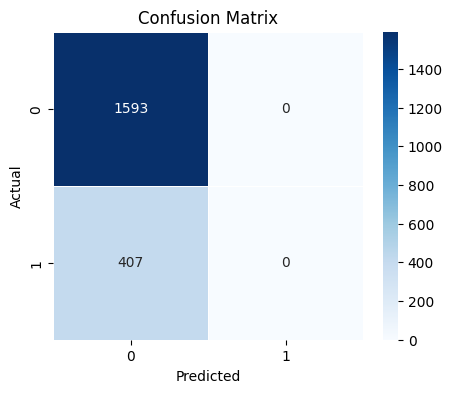

True Positives: 1593
False Positives: 0
True Negatives: 0
False Negatives: 407


In [229]:
#Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **XG Boost**

In [230]:
# Train and intialize XGBoost model
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [231]:
# Make predictions on test data
xgboost_predictions = xgboost_model.predict(X_test)

In [232]:
# Evaluate the performance of the model

xgboost_accuracy = accuracy_score(y_test, xgboost_predictions)
xgboost_precision = precision_score(y_test, xgboost_predictions)
xgboost_recall = recall_score(y_test, xgboost_predictions)
xgboost_f1 = f1_score(y_test, xgboost_predictions)

print('Accuracy:', round(xgboost_accuracy, 2))
print('Precision:', round(xgboost_precision, 2))
print('Recall:', round(xgboost_recall, 2))
print('F1 Score:', round(xgboost_f1, 2))

Accuracy: 0.86
Precision: 0.71
Recall: 0.51
F1 Score: 0.59


In [233]:
# Calculate classification report

conf_matrix = confusion_matrix(y_test, xgboost_predictions)
class_report = classification_report(y_test, xgboost_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.71      0.51      0.59       407

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



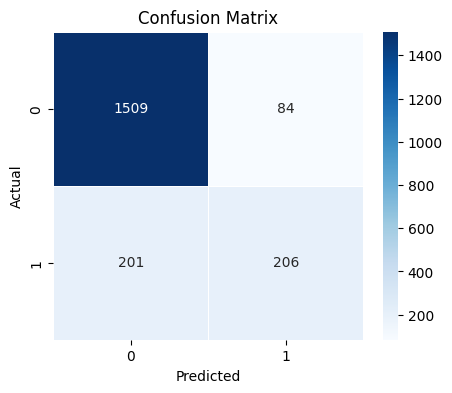

True Positives: 1509
False Positives: 84
True Negatives: 206
False Negatives: 201


In [234]:
#Plotting the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Light GBM(Gradient Boosting Machine)**

In [235]:
# Initialize LightGBM classifier
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'colsample_bytree': 0.9
}

In [236]:
# Initialize and train lgb model
lgbm_model = lgb.LGBMClassifier(**params)

# Train the classifier
lgbm_model.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


LGBMClassifier(colsample_bytree=0.9, feature_fraction=0.9, learning_rate=0.05,
               metric='binary_logloss', objective='binary')

In [237]:
# Make predictions on the test set
lgbm_predictions = lgbm_model.predict(X_test)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=0.9 will be ignored. Current value: feature_fraction=0.9


In [238]:
# Evaluate the performance of the model

lgbm_accuracy = accuracy_score(y_test, lgbm_predictions)
lgbm_precision = precision_score(y_test, lgbm_predictions)
lgbm_recall = recall_score(y_test, lgbm_predictions)
lgbm_f1 = f1_score(y_test, lgbm_predictions)

print('Accuracy:', round(lgbm_accuracy, 2))
print('Precision:', round(lgbm_precision, 2))
print('Recall:', round(lgbm_recall, 2))
print('F1 Score:', round(lgbm_f1, 2))


Accuracy: 0.87
Precision: 0.77
Recall: 0.5
F1 Score: 0.61


In [239]:
# Calculate confusion matrix and classification report

conf_matrix = confusion_matrix(y_test, lgbm_predictions)
class_report = classification_report(y_test, lgbm_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.61       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



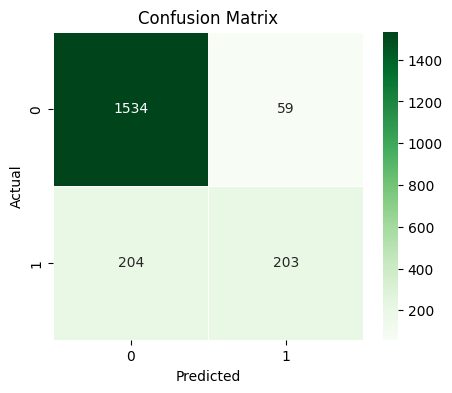

True Positives: 1534
False Positives: 59
True Negatives: 203
False Negatives: 204


In [240]:
#Plotting the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", linewidths=.5, annot_kws={"size": 10})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extract values from confusion matrix
tp, fp, fn, tn = conf_matrix.ravel()

# Print the values
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

### **Gradient Boosting**

In [241]:
# Create a GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_model.predict(X_test)


# Evaluate the performance
gb_accuracy = accuracy_score(y_test, predictions)
gb_precision = precision_score(y_test, predictions)
gb_recall = recall_score(y_test, predictions)
gb_f1 = f1_score(y_test, predictions)

print(f"Accuracy: {gb_accuracy}")
print(f"Precision: {gb_precision}")
print(f"Recall: {gb_recall}")
print(f"F1 Score: {gb_f1}")

Accuracy: 0.87
Precision: 0.7752808988764045
Recall: 0.5085995085995086
F1 Score: 0.6142433234421365


### **Comparison of Accuracy,Precision, Recall and F1-Score**

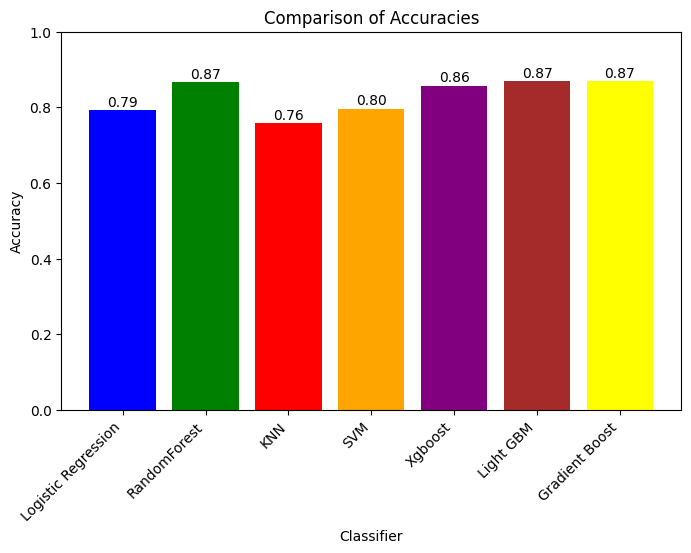

In [242]:
# Accuracy
classifiers = ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost']
accuracies = [log_accuracy,rf_accuracy, knn_accuracy, svm_accuracy, xgboost_accuracy,lgbm_accuracy,gb_accuracy]

colors = ['blue', 'green', 'red', 'orange','purple','brown','yellow']

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=colors)
plt.title('Comparison of Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization

# Labeling each bar with accuracy value
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.show()


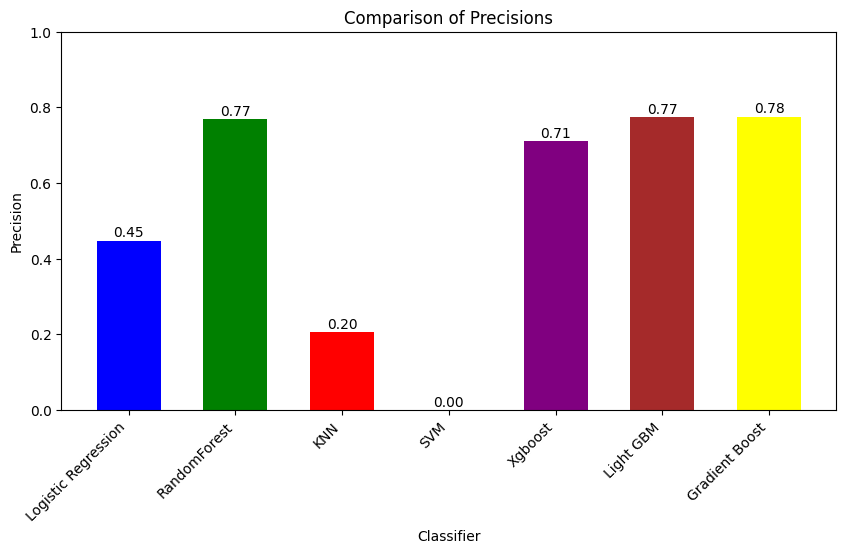

In [243]:
# Precison
classifiers = ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost']
precisions = [log_precision, rf_precision, knn_precision, svm_precision, xgboost_precision, lgbm_precision,gb_precision]

colors = ['blue', 'green', 'red', 'orange', 'purple','brown','yellow']

# Increase the width of the bars for more space
bar_width = 0.6

plt.figure(figsize=(10, 6))
plt.bar(classifiers, precisions, color=colors, width=bar_width)
plt.title('Comparison of Precisions')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization

# Labeling each bar with precision value
for i, precision in enumerate(precisions):
    plt.text(i, precision + 0.01, f'{precision:.2f}', ha='center')

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.show()



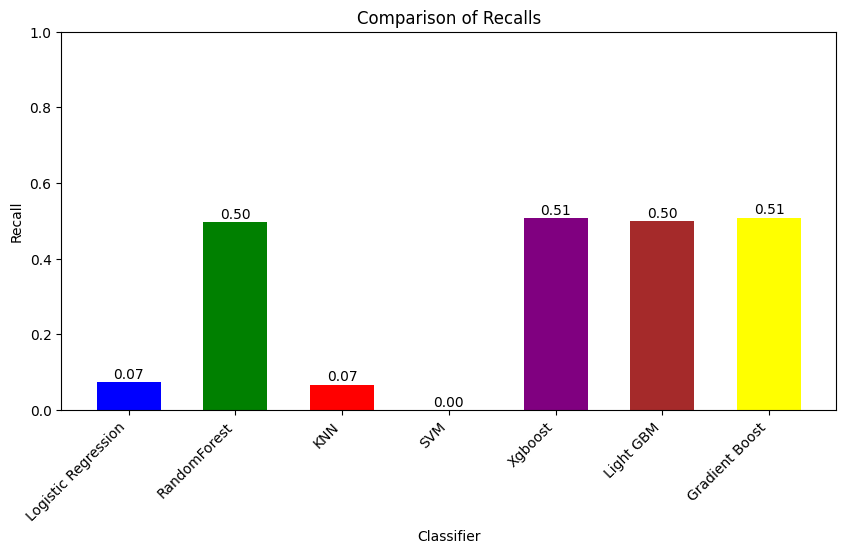

In [244]:
# Recall
classifiers = ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost']
recalls = [log_recall, rf_recall, knn_recall, svm_recall, xgboost_recall, lgbm_recall,gb_recall]

colors = ['blue', 'green', 'red', 'orange', 'purple','brown','yellow']

# Increase the width of the bars for more space
bar_width = 0.6

plt.figure(figsize=(10, 6))
plt.bar(classifiers, recalls, color=colors, width=bar_width)
plt.title('Comparison of Recalls')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization

# Labeling each bar with recall value
for i, recall in enumerate(recalls):
    plt.text(i, recall + 0.01, f'{recall:.2f}', ha='center')


plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.show()



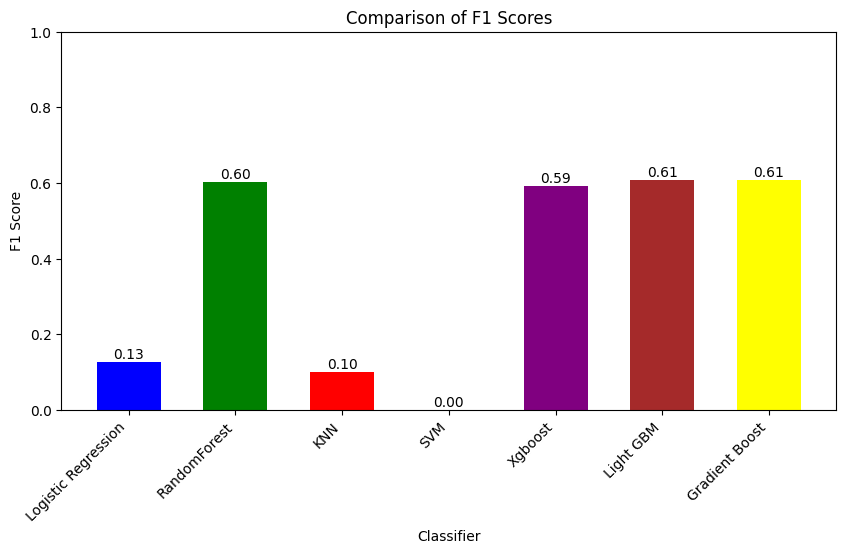

In [245]:
classifiers = ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost']
f1_scores = [log_f1, rf_f1, knn_f1, svm_f1, xgboost_f1, lgbm_f1,lgbm_f1]

colors = ['blue', 'green', 'red', 'orange', 'purple','brown','yellow']

# Increase the width of the bars for more space
bar_width = 0.6

plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_scores, color=colors, width=bar_width)
plt.title('Comparison of F1 Scores')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)  # Setting y-axis limit for better visualization

# Labeling each bar with F1 score value
for i, f1_score in enumerate(f1_scores):
    plt.text(i, f1_score + 0.01, f'{f1_score:.2f}', ha='center')


plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.show()


### **Model Performance Report**

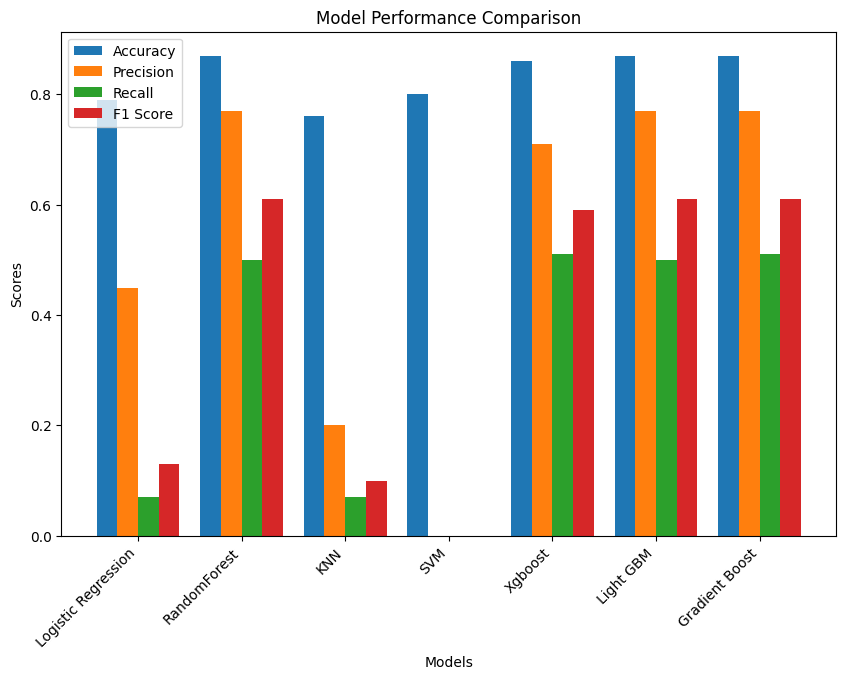

In [246]:
models = ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost']
accuracy = [0.79, 0.87, 0.76, 0.8, 0.86, 0.87,0.87]
precision = [0.45, 0.77, 0.2, 0.0, 0.71, 0.77,0.77]
recall = [0.07, 0.5, 0.07, 0.0, 0.51, 0.5,0.51]
f1_score = [0.13, 0.61, 0.1, 0.0, 0.59, 0.61,0.61]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.bar(index, accuracy, bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precision, bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recall, bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_score, bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models)
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(bottom=0.25)

plt.show()


In [247]:
data1 = {'Model': ['Logistic Regression','RandomForest','KNN', 'SVM', 'Xgboost', 'Light GBM','Gradient Boost'],
         'Accuracy' : [0.79, 0.87, 0.76, 0.8, 0.86, 0.87,0.87],
         'Precision':  [0.45, 0.77, 0.2, 0.0, 0.71, 0.77,0.77],
         'Recall' : [0.07, 0.5, 0.07, 0.0, 0.51, 0.5,0.51],
        'F1 Score': [0.13, 0.61, 0.1, 0.0, 0.59, 0.61,0.61]}

df1 = pd.DataFrame(data1)
df1


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.79,0.45,0.07,0.13
1,RandomForest,0.87,0.77,0.50,0.61
2,KNN,0.76,0.20,0.07,0.10
3,SVM,0.80,0.00,0.00,0.00
4,Xgboost,0.86,0.71,0.51,0.59
5,Light GBM,0.87,0.77,0.50,0.61
6,Gradient Boost,0.87,0.77,0.51,0.61
